# ENTREGABLE 2

# INSTRUCCIONES

Realizar la segunda fase del análisis exploratorio usando el archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [1]:
import pandas as pd

In [2]:
ruta = 'dataset_banco_clean.csv'
data = pd.read_csv(ruta)
pd.options.mode.chained_assignment = None

In [3]:
print(data.shape)
data.head()

(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [5]:
for i in data.columns:
    print(f'Variable {i} tipo')
    print(type(data[i][0]))

Variable age tipo
<class 'numpy.int64'>
Variable job tipo
<class 'str'>
Variable marital tipo
<class 'str'>
Variable education tipo
<class 'str'>
Variable default tipo
<class 'str'>
Variable balance tipo
<class 'numpy.float64'>
Variable housing tipo
<class 'str'>
Variable loan tipo
<class 'str'>
Variable contact tipo
<class 'str'>
Variable day tipo
<class 'numpy.int64'>
Variable month tipo
<class 'str'>
Variable duration tipo
<class 'numpy.float64'>
Variable campaign tipo
<class 'numpy.int64'>
Variable pdays tipo
<class 'numpy.float64'>
Variable previous tipo
<class 'numpy.int64'>
Variable poutcome tipo
<class 'str'>
Variable y tipo
<class 'str'>


## ANALISIS UNIVARIANTE

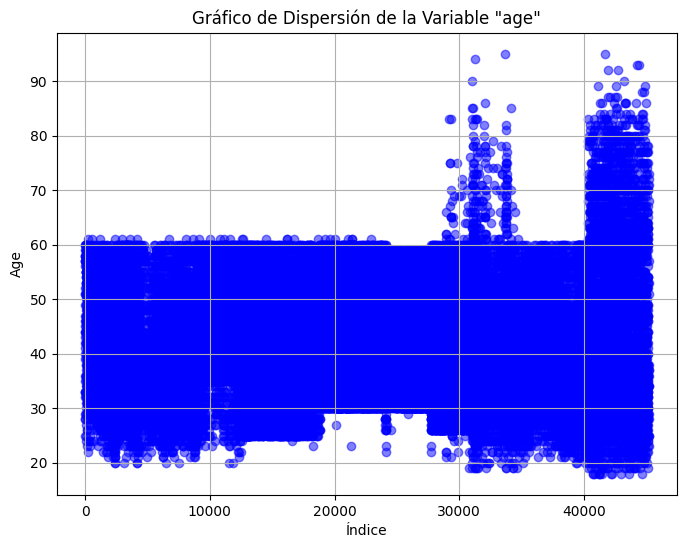

In [6]:
# VARIABLE EDAD

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data.index, data['age'], color='blue', alpha=0.5)
plt.title('Gráfico de Dispersión de la Variable "age"')
plt.xlabel('Índice')
plt.ylabel('Age')
plt.grid(True)
plt.show()


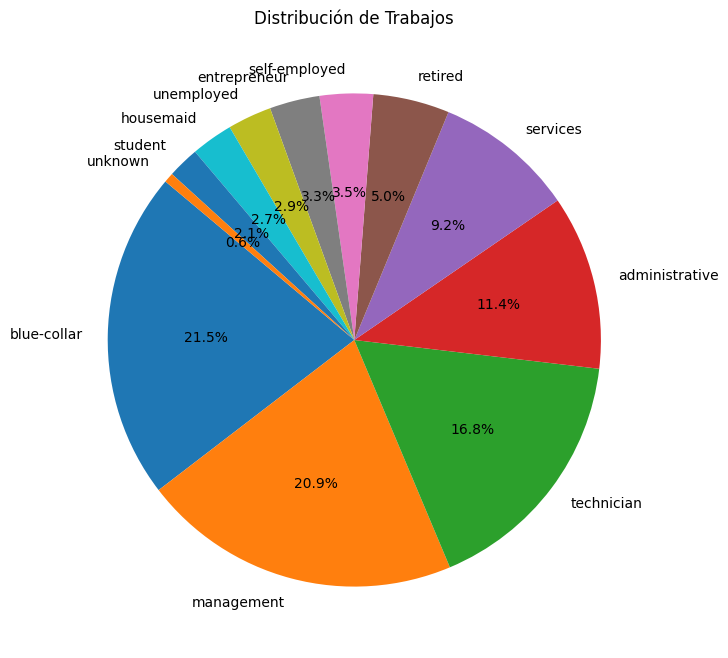

In [7]:
# VARIABLE JOB

job_counts = data['job'].value_counts()

plt.figure(figsize=(7, 8))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Trabajos')
plt.axis('equal')
plt.show()


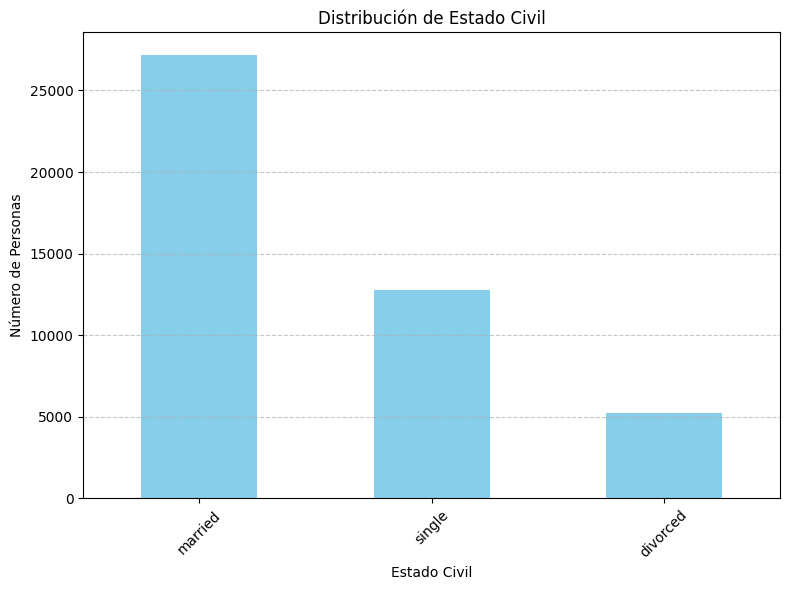

In [8]:
# VARIABLE MARITAL

marital_counts = data['marital'].value_counts()

plt.figure(figsize=(8, 6))
marital_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Personas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()


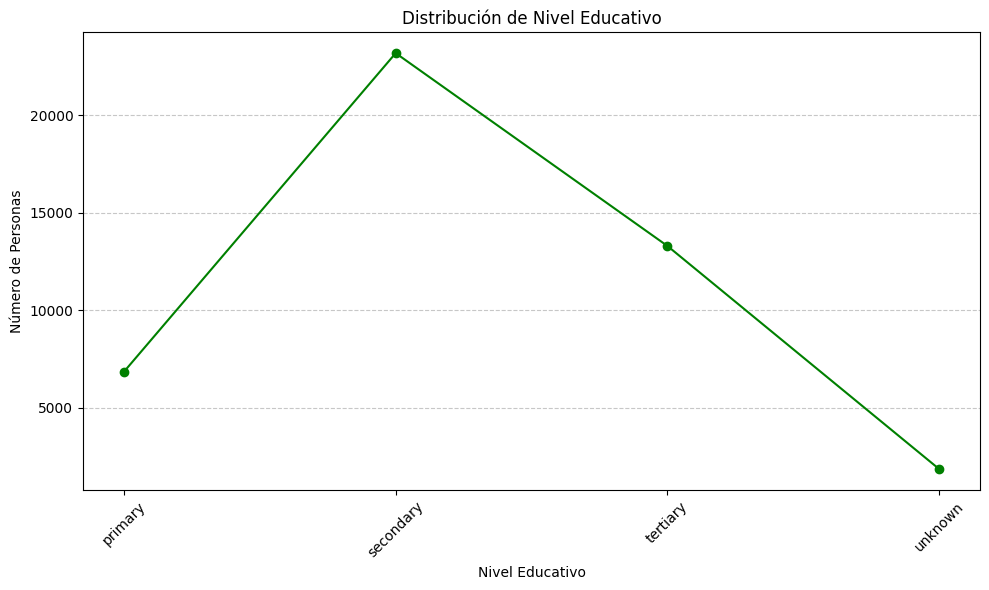

In [9]:
# VARIABLE EDUCATION 

education_counts = data['education'].value_counts()
education_counts = education_counts.sort_index()

plt.figure(figsize=(10, 6))
plt.plot(education_counts.index, education_counts.values, marker='o', color='green', linestyle='-')
plt.title('Distribución de Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Número de Personas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

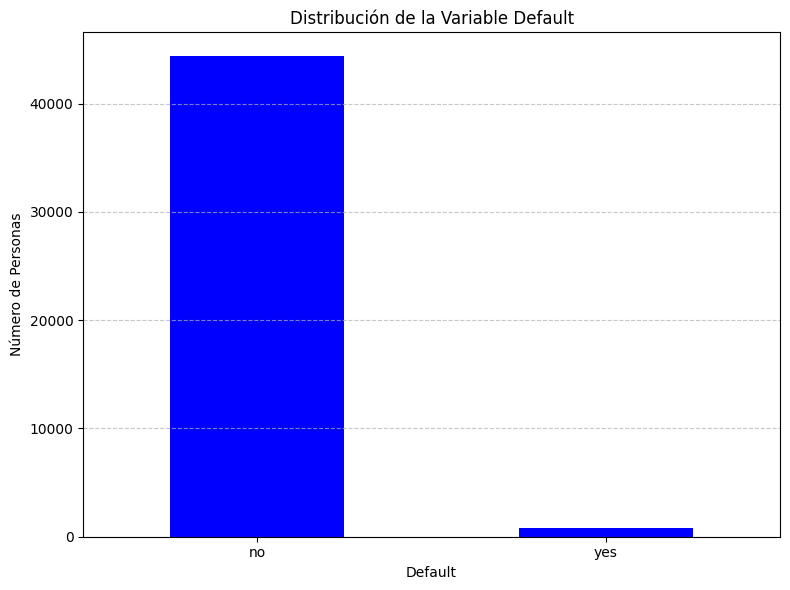

In [10]:
# VARIABLE DEFAULT

default_counts = data['default'].value_counts()

plt.figure(figsize=(8, 6))
default_counts.plot(kind='bar', color='blue')
plt.title('Distribución de la Variable Default')
plt.xlabel('Default')
plt.ylabel('Número de Personas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

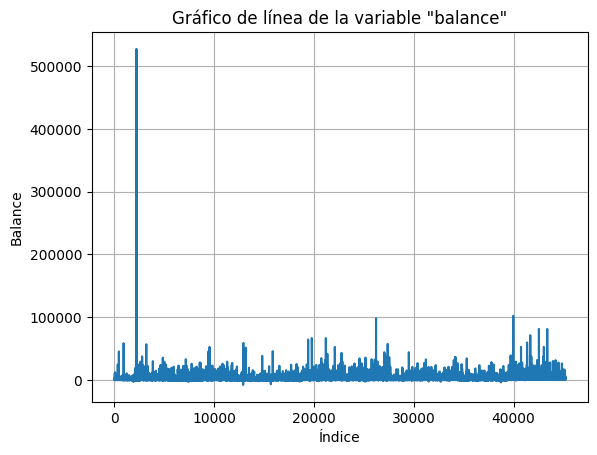

In [11]:
# VARIABLE BALANCE

plt.plot(data.index, data['balance'])
plt.title('Gráfico de línea de la variable "balance"')
plt.xlabel('Índice')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

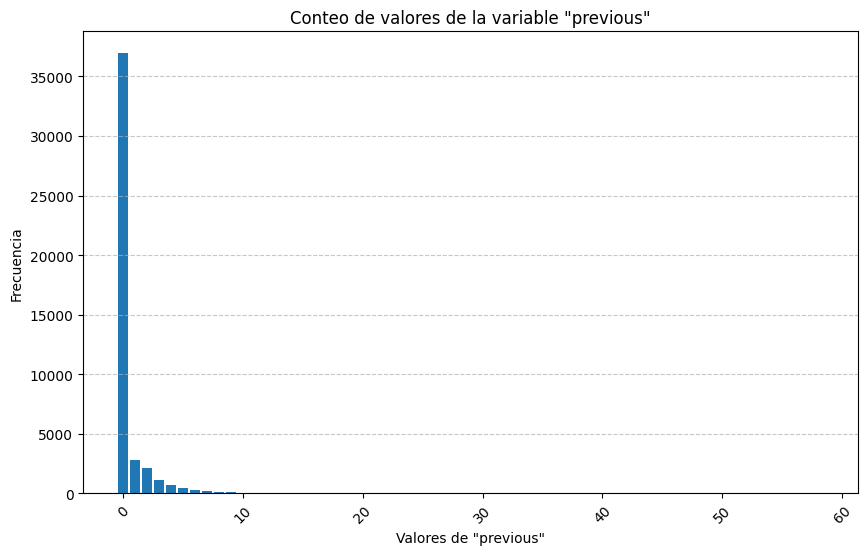

In [12]:
# VARIABLE PREVIOUS

plt.figure(figsize=(10, 6))
plt.bar(data['previous'].value_counts().index, data['previous'].value_counts())

plt.title('Conteo de valores de la variable "previous"')
plt.xlabel('Valores de "previous"')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

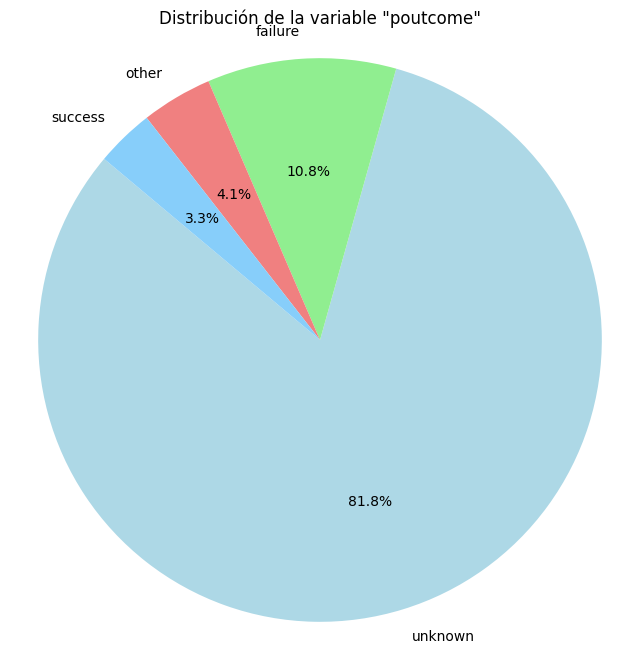

In [13]:
# VARIABLE OUTCOME

poutcome_counts = data['poutcome'].value_counts()
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 8))
plt.pie(poutcome_counts, labels=poutcome_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de la variable "poutcome"')
plt.axis('equal')
plt.show()


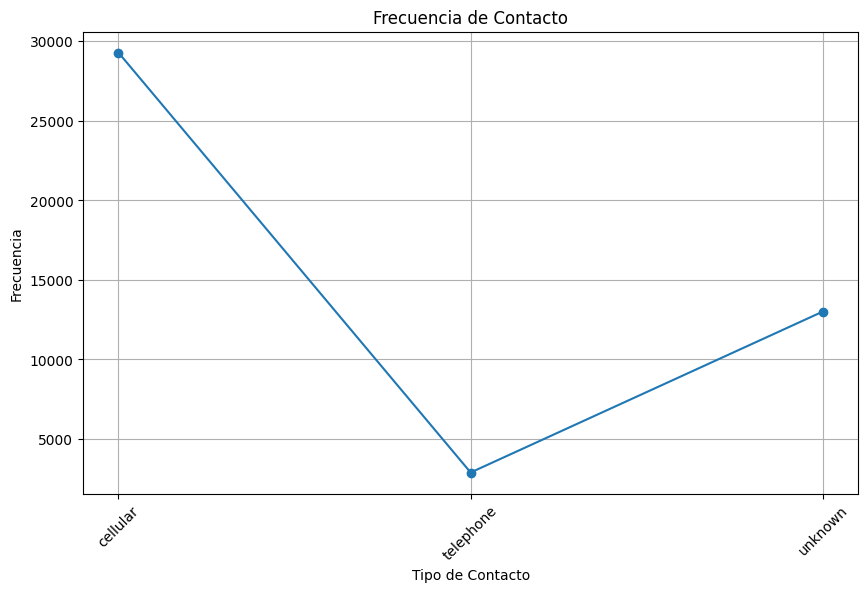

In [14]:
# VARIABLE CONTACT

contact_counts = data['contact'].value_counts()
contact_counts = contact_counts.sort_index()

plt.figure(figsize=(10, 6))
plt.plot(contact_counts.index, contact_counts.values, marker='o', linestyle='-')

plt.title('Frecuencia de Contacto')
plt.xlabel('Tipo de Contacto')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.xticks(rotation=45) 
plt.show()

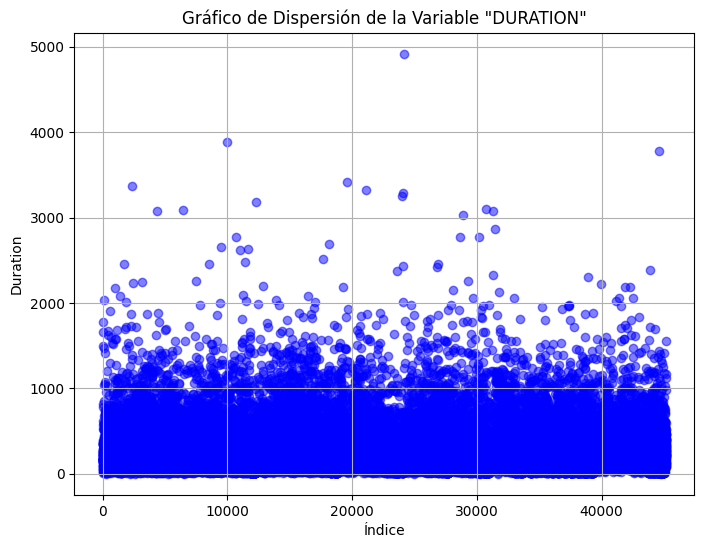

In [15]:
# VARIABLE DURATION

plt.figure(figsize=(8, 6))
plt.scatter(data.index, data['duration'], color='blue', alpha=0.5)
plt.title('Gráfico de Dispersión de la Variable "DURATION"')
plt.xlabel('Índice')
plt.ylabel('Duration')
plt.grid(True)
plt.show()

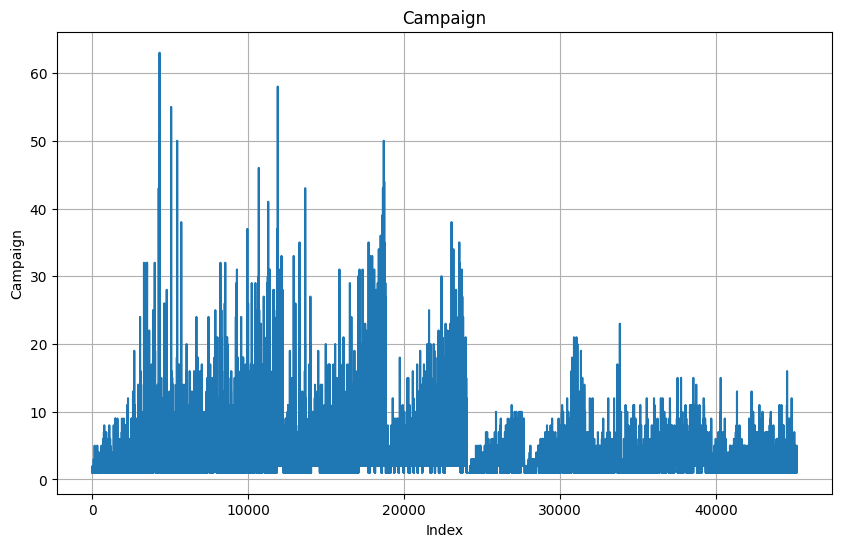

In [16]:
# VARIABLE CAMPAIGN

plt.figure(figsize=(10, 6))
plt.plot(data['campaign'])

plt.title('Campaign')
plt.xlabel('Index')
plt.ylabel('Campaign')
plt.grid(True)
plt.show()


/var/folders/n3/hmfs0mds4xl6r9lxv0yr6phh0000gn/T/ipykernel_962/3561923545.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['pdays'], shade=True)


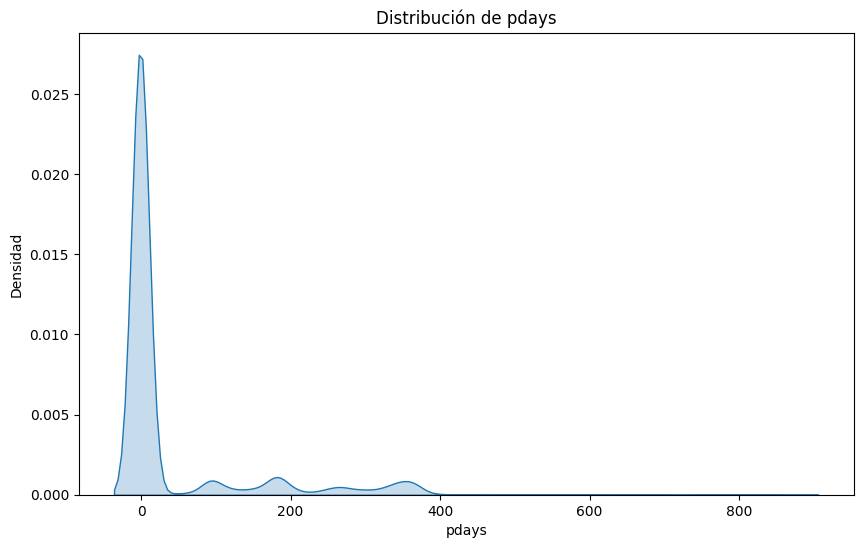

In [17]:
# VARIABLE PDAYS

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(data['pdays'], shade=True)

plt.title('Distribución de pdays')
plt.xlabel('pdays')
plt.ylabel('Densidad')
plt.show()


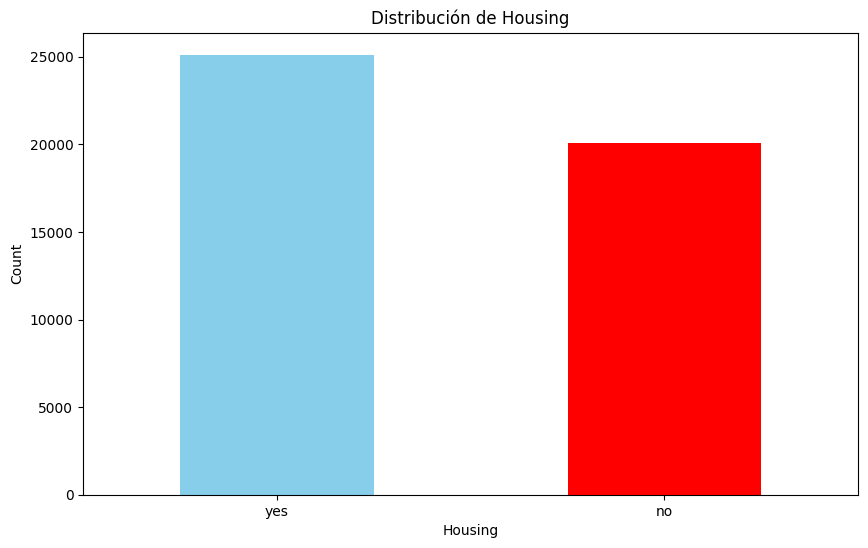

In [18]:
# VARIABLE HOUSING

housing_counts = data['housing'].value_counts()
housing_counts.plot(kind='bar', color=['skyblue', 'red'], figsize=(10, 6))

plt.title('Distribución de Housing')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()


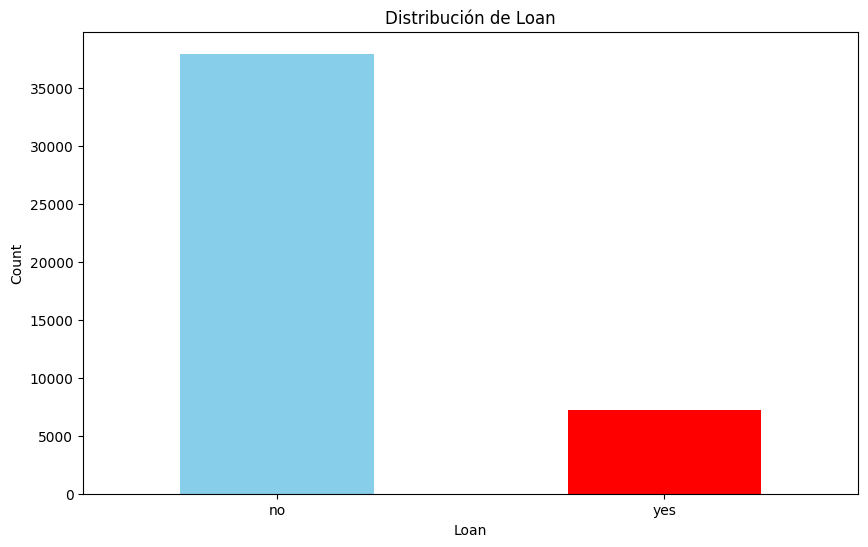

In [25]:
# VARIABLE LOAN

housing_counts = data['loan'].value_counts()
housing_counts.plot(kind='bar', color=['skyblue', 'red'], figsize=(10, 6))

plt.title('Distribución de Loan')
plt.xlabel('Loan')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()


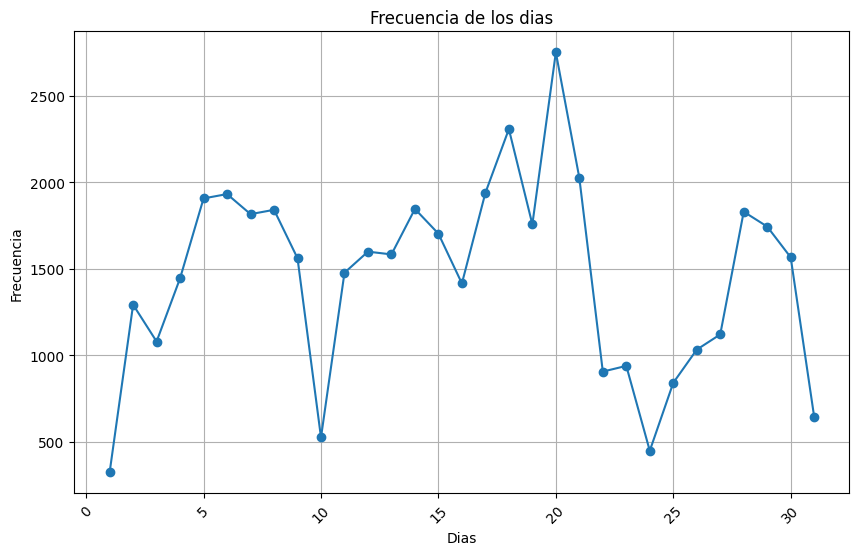

In [28]:
# VARIABLE DAY

contact_counts = data['day'].value_counts()
contact_counts = contact_counts.sort_index()

plt.figure(figsize=(10, 6))
plt.plot(contact_counts.index, contact_counts.values, marker='o', linestyle='-')

plt.title('Frecuencia de los dias')
plt.xlabel('Dias')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.xticks(rotation=45) 
plt.show()

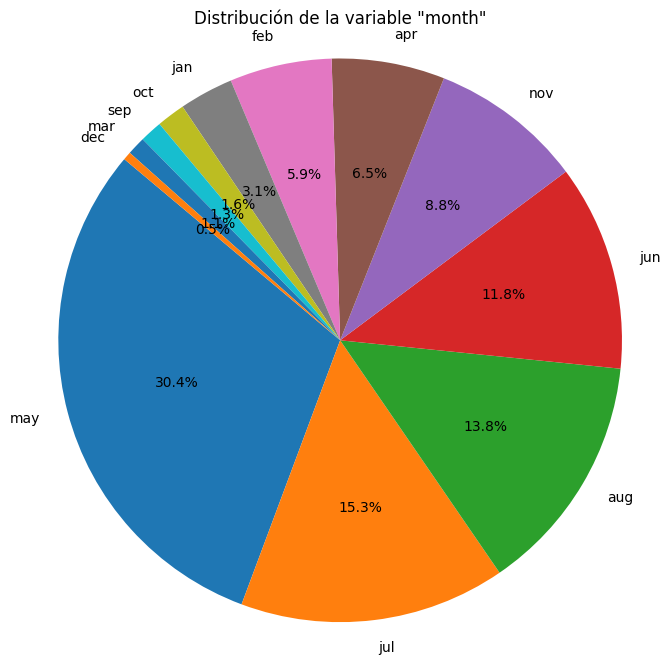

In [30]:
# VARIABLE MONTH

month_counts = data['month'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de la variable "month"')
plt.axis('equal')
plt.show()


## ANALISIS BIVARIANTE

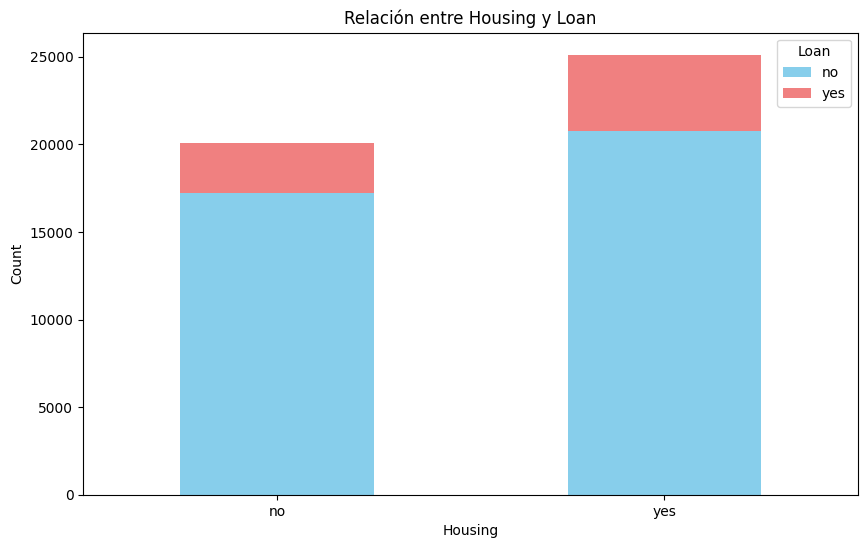

In [31]:
cross_table = pd.crosstab(data['housing'], data['loan'])
cross_table.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(10, 6))

plt.title('Relación entre Housing y Loan')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan')
plt.show()

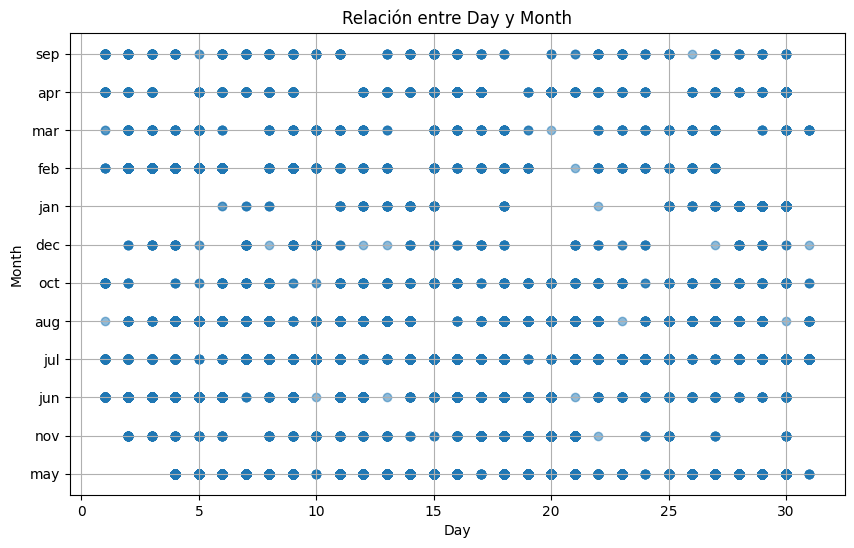

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['day'], data['month'], alpha=0.5)

plt.title('Relación entre Day y Month')
plt.xlabel('Day')
plt.ylabel('Month')
plt.grid(True)
plt.show()


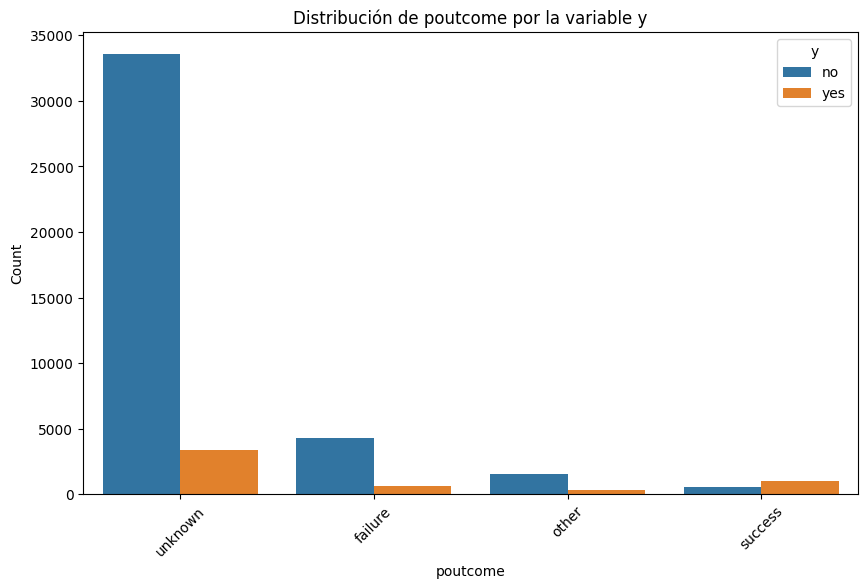

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='poutcome', hue='y')

plt.title('Distribución de poutcome por la variable y')
plt.xlabel('poutcome')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.legend(title='y')
plt.show()


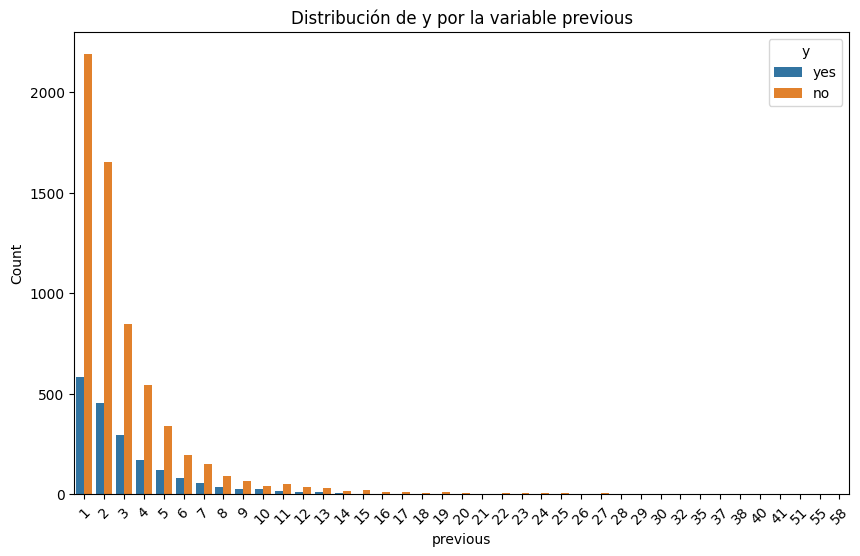

In [34]:
data_prev = data[data['previous'] > 0]

plt.figure(figsize=(10, 6))
sns.countplot(data=data_prev, x='previous', hue='y')

plt.title('Distribución de y por la variable previous')
plt.xlabel('previous')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.legend(title='y')
plt.show()

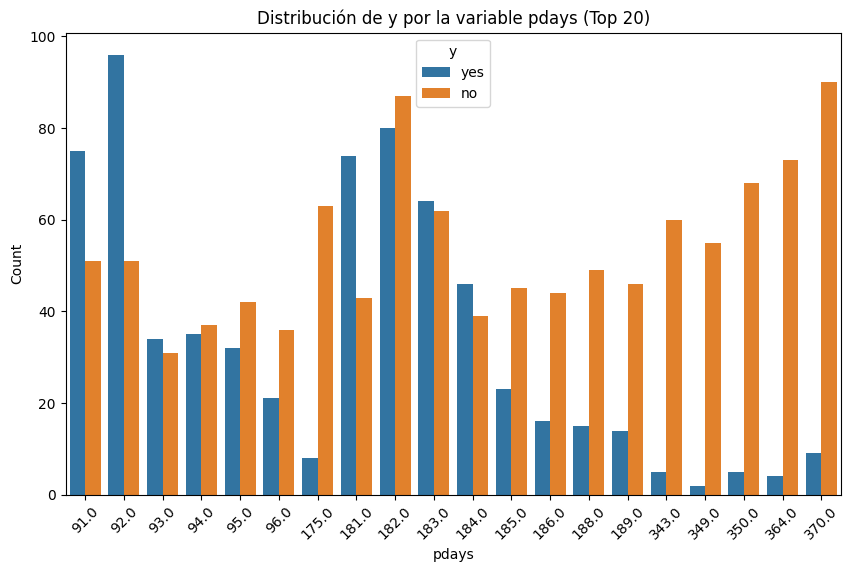

In [23]:
data_pdays = data[data['pdays'] > 0]
top_pdays = data_pdays['pdays'].value_counts().nlargest(20).index

data_top_pdays = data_pdays[data_pdays['pdays'].isin(top_pdays)]

plt.figure(figsize=(10, 6))
sns.countplot(data=data_top_pdays, x='pdays', hue='y')

plt.title('Distribución de y por la variable pdays (Top 20)')
plt.xlabel('pdays')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.legend(title='y')
plt.show()


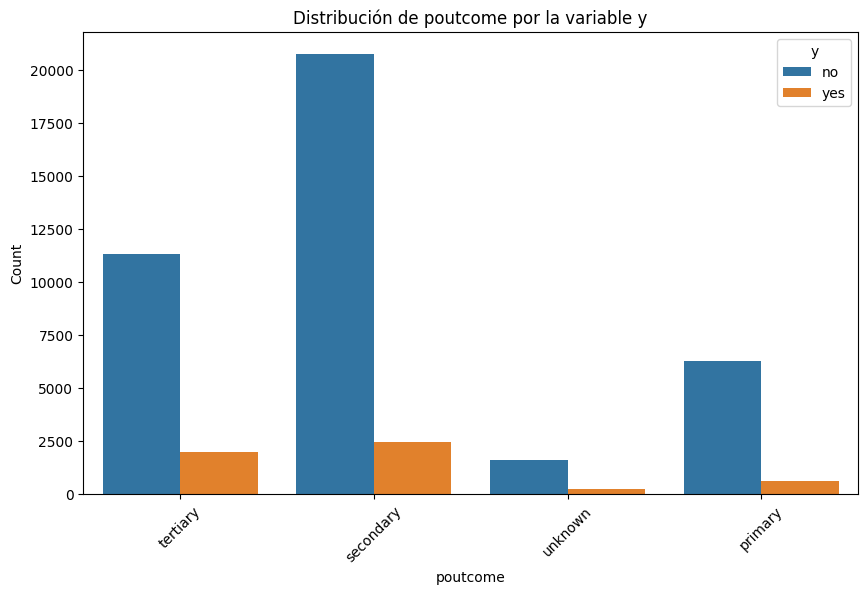

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='education', hue='y')

plt.title('Distribución de poutcome por la variable y')
plt.xlabel('poutcome')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.legend(title='y')
plt.show()


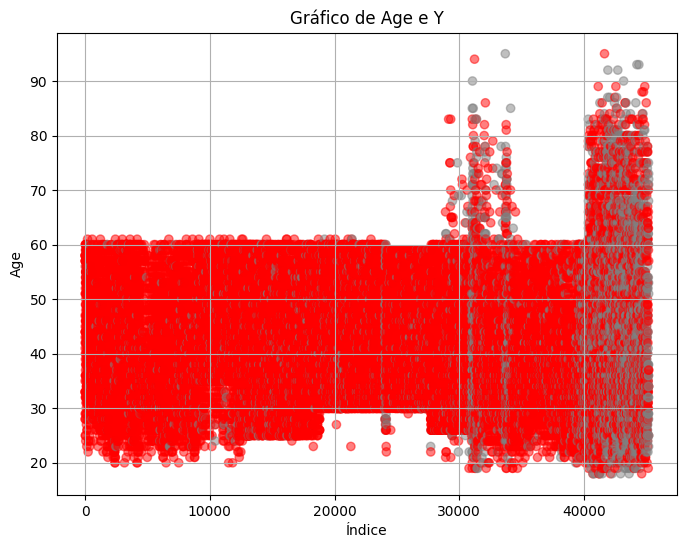

In [41]:
import matplotlib.pyplot as plt

# Obtener la última columna (suponiendo que está en la variable 'Y')
Y = data.iloc[:, -1]

# Mapear 'si' a verde y 'no' a rojo, los valores NaN a gris
colors = {'si': 'green', 'no': 'red'}
default_color = 'gray'

plt.figure(figsize=(8, 6))
plt.scatter(data.index, data['age'], c=Y.map(colors).fillna(default_color), alpha=0.5)
plt.title('Gráfico de Age e Y')
plt.xlabel('Índice')
plt.ylabel('Age')
plt.grid(True)
plt.show()


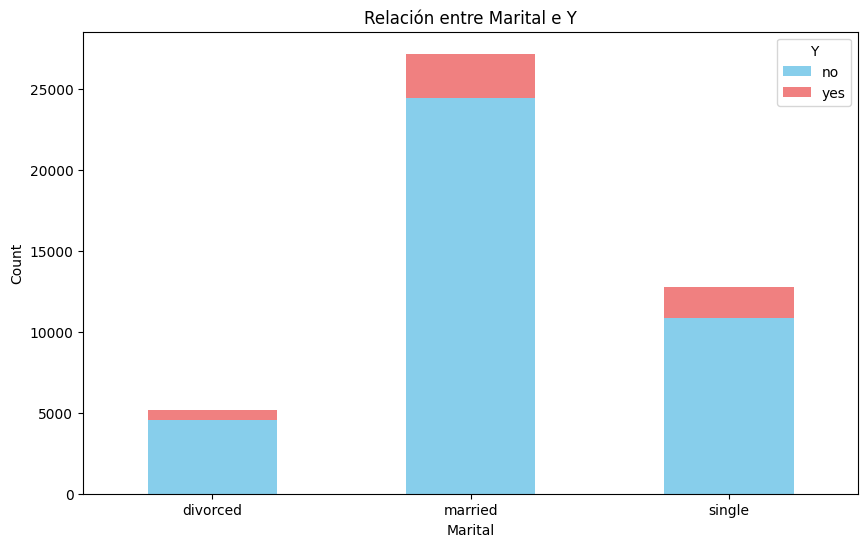

In [44]:
cross_table = pd.crosstab(data['marital'], data['y'])
cross_table.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(10, 6))

plt.title('Relación entre Marital e Y')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Y')
plt.show()

## ANALISIS MULTIVARIANTE

/var/folders/n3/hmfs0mds4xl6r9lxv0yr6phh0000gn/T/ipykernel_962/2203742631.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


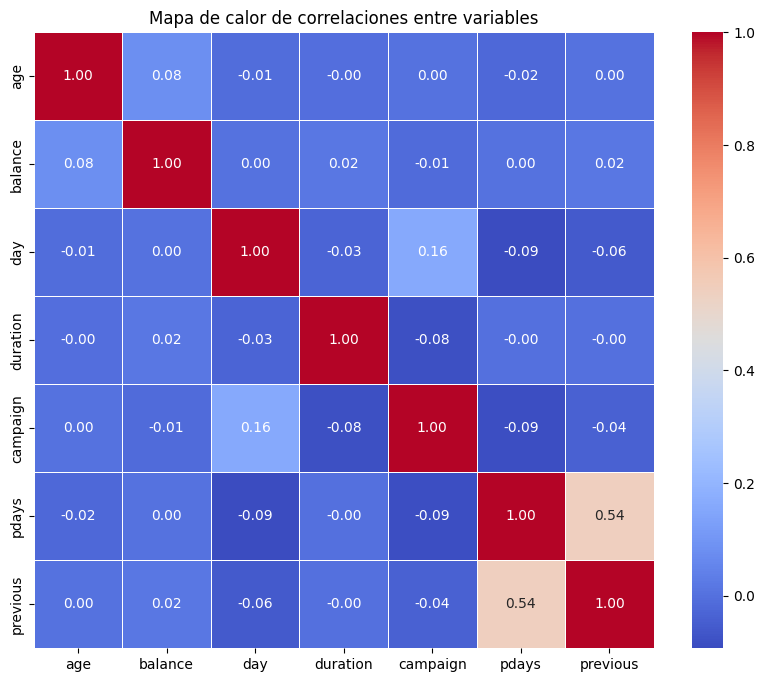

In [45]:
import seaborn as sns

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor de correlaciones entre variables')
plt.show()


# Conclusiones

Gracias al análisis EDA realizado, hemos podido obtener las siguientes conclusiones:

1. Distribución de las variables: Las visualizaciones de histogramas y diagramas nos permitieron observar la distribución de las variables numéricas en el conjunto de datos. Encontramos que la variable "edad" sigue una distribución aproximadamente normal, mientras que otras variables como "pdays" o "campaign" no lo hacen debido a valores atípicos.
   
2. Correlaciones entre variables: Utilizando un mapa de calor de correlaciones, pudimos identificar las relaciones lineales entre pares de variables. Por ejemplo, encontramos una correlación positiva entre "day" y "campaign", lo que indica que a medida que aumenta el numero de días, tiende a aumentar el número de dias de la campaña.

3. Análisis de variables categóricas: Mediante gráficos de barras, examinamos la distribución de las variables categóricas como "estado civil" y "educación". Observamos que la mayoría de las personas en el conjunto de datos están casadas y tienen educación secundaria.

4. Relaciones entre mas de una variable: Utilizamos gráficos que combinan dos variables para ver cual es su relación. Por ejemplo, observamos que las personas casadas tienden a tener realizar la suscripción.

En resumen, el análisis exploratorio de datos nos proporcionó una comprensión profunda de la estructura y las relaciones en nuestro conjunto de datos, lo que nos ayudó a generar hipótesis y guiar análisis posteriores. Las visualizaciones desempeñaron un papel crucial en este proceso al hacer que los patrones y las relaciones en los datos fueran más claros y accesibles.